<a href="https://colab.research.google.com/github/AlmuMell/Store_sales_analysis/blob/main/Store_sales_analysis_Equipo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---




##Una tienda online de moda, con presencia en todo Brasil, necesita impulsar su rendimiento utilizando sus datos de manera estratégica. Como científico de datos, la tarea es analizar estos datos y ofrecer insights que guíen sus decisiones y respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cual es el Top 5 productos más vendidos históricamente?

2. ¿Cual es la evolución histórica de las ingresos netos?

3. ¿Cuáles son los ingresos netos por vendedor por año?

4. ¿Cuáles son las ciudades que proporcionan mayores ingresos netos?

5. ¿Existe otro insight que puedas proporcionar?

#**1. Configuración del Ambiente**


---




In [ ]:
!pip install geobr
import geobr
import geopandas as gpd
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyBboxPatch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import requests
from io import BytesIO
from sqlalchemy import create_engine, MetaData, Table, inspect, text
global df_itens_pedidos, df_pedidos, df_productos, df_vendedores, database

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.0 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.3
    Uninstalling shapely-2.0.3:
      Successfully uninstalled shapely-2.0.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.4
    Uninstalling lxml-4.9.4:
      Successfully uninstalled lxml-4.9.4
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2


#**2. Obtención, Tratamiento y Análisis Exploratório (EDA)**


---




##**2.1 Cargando las bases de datos**

Carguemos las bases datos a utilizar, en total serán 4 tablas.

In [ ]:
#Base de Datos de Items Pedidos
df_itens_pedidos = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/itens_pedidos.csv')
df_itens_pedidos.head()

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0


In [ ]:
df_pedidos = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/pedidos.csv')
df_pedidos.head()

,pedido_id,producto_id,vendedor_id,fecha_compra,total
0,341,41518,6,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575


In [ ]:
df_productos = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/productos.csv')
df_productos.head()

,producto_id,producto,precio,marca,sku,condicion
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297.0,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612.0,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482.0,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658.0,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248.0,Usado


In [ ]:
df_vendedores = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/vendedores.csv')
df_vendedores

,vendedor_id,nombre_vendedor
0,1,Ana Duarte
1,2,Daniel Siqueira
2,3,Nadia Oliveira
3,4,Millena Pereira
4,5,Paulo Calanca
5,6,Unknown


##**2.2 Tratamiento de Datos**

Veamos un poco la información de los 4 dataframes.

In [ ]:
print(df_itens_pedidos.info())
print('-------------')
print(df_pedidos.info())
print('-------------')
print(df_productos.info())
print('-------------')
print(df_vendedores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_recibo       24527 non-null  int64  
 1   producto_id     24527 non-null  int64  
 2   pedido_id       24527 non-null  int64  
 3   cantidad        24527 non-null  int64  
 4   valor_unitario  24527 non-null  int64  
 5   valor_total     24527 non-null  int64  
 6   ciudad          24527 non-null  object 
 7   costo_envio     24527 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 1.5+ MB
None
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pedido_id     24527 non-null  int64 
 1   producto_id   24527 non-null  int64 
 2   vendedor_id   24527 non-null  int64 
 3   fecha_compra  24527 non-null  object
 


*   Parece ser que casi **no hay registros nulos**, solamente 2 en *df_pedidos*.

*   Algunos tipos de datos no son los adecuados, tanto para **fechas** como para  valores que deberían ser enteros o string como **SKU**.

*   Podemos deducir que las primary key son: **id_recibo, pedido_id, producto_id y vendedor_id**

*   Algunas foreing keys son: **pedido_id, producto_id, vendedor_id**




Tratemos estos tipos de datos con una función de preprocesamiento.

In [ ]:
#Función Preprocesamiento
def preprocesamiento():
  global df_itens_pedidos, df_pedidos, df_productos, df_vendedores

  #Lista de dataframes
  dataframes = [df_itens_pedidos, df_pedidos, df_productos, df_vendedores]

  #Eliminar registros nulos en primary keys o foreign keys
  for df in dataframes:

    #Eliminar valores nulos en la primera columna (que normalmente es la primary key)
    df.dropna(subset=[df.columns[0]], inplace=True)
    #Eliminar cualquier registro nulo
    df.dropna(inplace=True)
    #Eliminar registros duplicados
    df.drop_duplicates(inplace=True)

  #Modificar DTypes
  df_pedidos['fecha_compra'] = pd.to_datetime(df_pedidos['fecha_compra'])
  df_productos['sku'] = df_productos['sku'].astype(int)

In [ ]:
preprocesamiento()
print(df_itens_pedidos.info())
print('-------------')
print(df_pedidos.info())
print('-------------')
print(df_productos.info())
print('-------------')
print(df_vendedores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_recibo       24527 non-null  int64  
 1   producto_id     24527 non-null  int64  
 2   pedido_id       24527 non-null  int64  
 3   cantidad        24527 non-null  int64  
 4   valor_unitario  24527 non-null  int64  
 5   valor_total     24527 non-null  int64  
 6   ciudad          24527 non-null  object 
 7   costo_envio     24527 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 1.5+ MB
None
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pedido_id     24527 non-null  int64         
 1   producto_id   24527 non-null  int64         
 2   vendedor_id   24527 non-null  int64         
 3 

Sólo se eliminaron 2 registros nulos de 207 datos en df_pedidos.

##**2.3 Análisis Exploratorio (EDA)**

Veamos algunos estadísticos de los dataframes:

In [ ]:
df_itens_pedidos.describe()

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,costo_envio
count,24527.000000,24527.000000,24527.000000,24527.000000,24527.00000,24527.000000,24527.000000
mean,12405.414278,44627.641171,69931.383088,3.497126,535.68867,1867.490113,373.498023
std,7242.697484,29347.824879,40560.769565,1.706170,839.21405,3379.681887,675.936377
min,1.000000,2706.000000,1.000000,1.000000,45.00000,45.000000,9.000000
25%,6132.500000,17258.000000,34487.000000,2.000000,210.00000,520.000000,104.000000
50%,12264.000000,42913.000000,69945.000000,4.000000,336.00000,1050.000000,210.000000
75%,18689.500000,70673.000000,105355.000000,5.000000,450.00000,1920.000000,384.000000
max,25055.000000,100983.000000,139993.000000,6.000000,6500.00000,39000.000000,7800.000000


In [ ]:
#df_itens_pedidos['ganancia_neta'] = df_itens_pedidos['valor_total'] - df_itens_pedidos['costo_envio']
df_itens_pedidos

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0
...,...,...,...,...,...,...,...,...
24522,25051,64127,63716,4,590,2360,BR-PE,472.0
24523,25052,37384,63999,4,700,2800,BR-RO,560.0
24524,25053,100932,64594,5,3900,19500,BR-RO,3900.0
24525,25054,3820,64811,3,139,417,BR-MA,83.4


In [ ]:
#Productos diferentes coinciden
print(f"Existen {len(df_itens_pedidos['producto_id'].unique())} diferentes productos en df_itens_pedidos.")

Existen 205 diferentes productos en df_itens_pedidos.


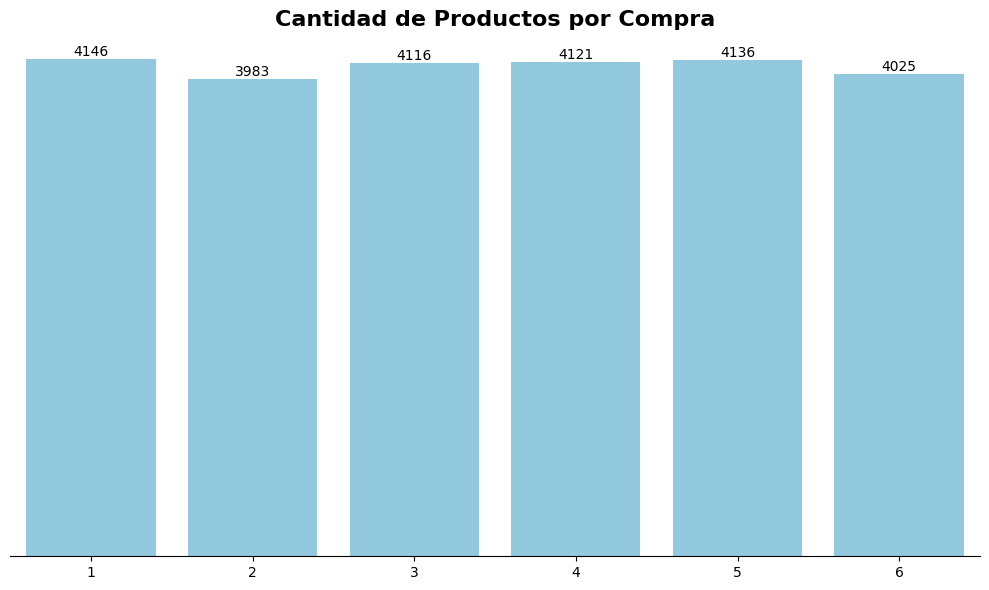

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_itens_pedidos, x='cantidad', color='skyblue')

#Obtener la frecuencia de cada valor
counts = df_itens_pedidos['cantidad'].value_counts()

#Agregar el valor encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, int(height), ha='center', va='bottom')

plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.title('Cantidad de Productos por Compra', fontsize=16, fontweight='bold')

#Ocultar los bordes
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show()

Insights de Productos por Compra

Las cantidades de productos comprados en cada ocasión son bastante consistentes, variando ligeramente pero manteniéndose en un rango similar. Esto podría indicar una demanda constante de productos o un patrón de compra estable por parte del consumidor. No hay una tendencia clara de aumento o disminución en la cantidad de productos comprados a lo largo de estas seis compras.


In [ ]:
df_pedidos.describe()

,pedido_id,producto_id,vendedor_id,fecha_compra,total
count,24527.000000,24527.000000,24527.000000,24527,24527.000000
mean,69931.383088,44627.641171,2.975782,2020-04-02 12:10:46.406001664,1867.490113
min,1.000000,2706.000000,1.000000,2019-01-05 00:00:00,45.000000
25%,34487.000000,17258.000000,2.000000,2019-11-12 00:00:00,520.000000
50%,69945.000000,42913.000000,3.000000,2020-04-09 00:00:00,1050.000000
75%,105355.000000,70673.000000,4.000000,2020-09-21 00:00:00,1920.000000
max,139993.000000,100983.000000,6.000000,2021-03-10 00:00:00,39000.000000
std,40560.769565,29347.824879,1.442412,NaN,3379.681887


In [ ]:
print(f"Existen {len(df_pedidos['vendedor_id'].unique())} vendedores en la tienda.")

Existen 6 vendedores en la tienda.


In [ ]:
#Realizar el merge en base a la columna 'vendedor_id'
df_merged = pd.merge(df_pedidos, df_vendedores, on='vendedor_id', how='inner')
df_merged

,pedido_id,producto_id,vendedor_id,fecha_compra,total,nombre_vendedor
0,341,41518,6,2019-01-05,780,Unknown
1,1174,4307,3,2019-01-05,30875,Nadia Oliveira
2,3443,86243,3,2019-01-05,1400,Nadia Oliveira
3,3687,100961,3,2019-01-06,960,Nadia Oliveira
4,3870,59337,3,2019-01-07,1950,Nadia Oliveira
...,...,...,...,...,...,...
24522,44447,83009,5,2021-02-21,1400,Paulo Calanca
24523,47664,4553,5,2021-02-21,550,Paulo Calanca
24524,48004,31835,5,2021-02-21,2394,Paulo Calanca
24525,55759,12609,5,2021-03-07,1600,Paulo Calanca


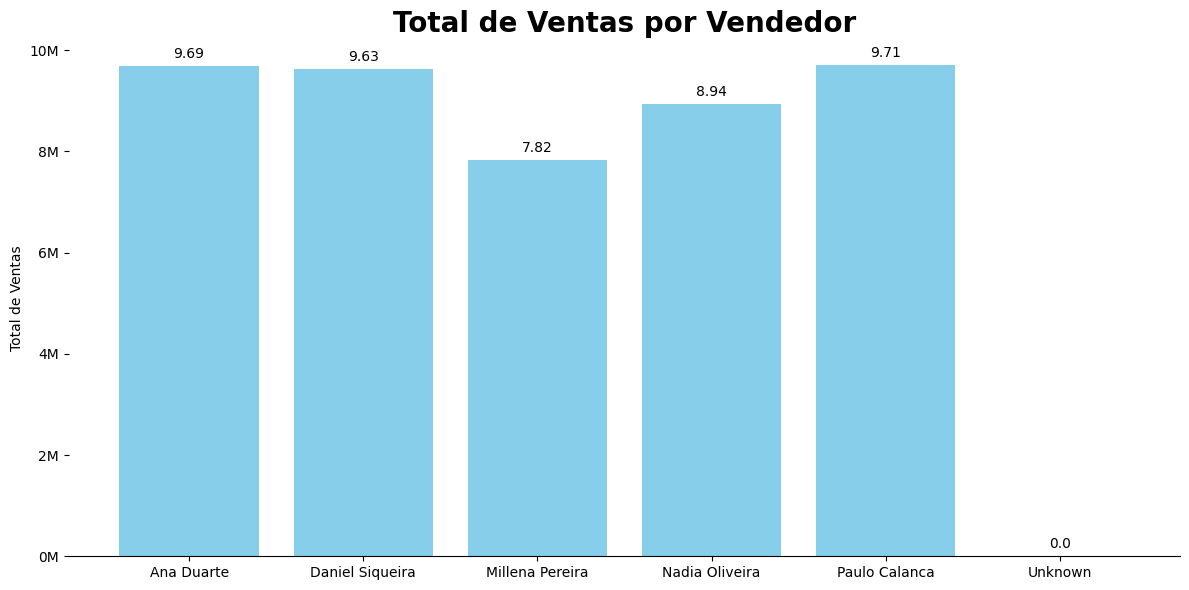

In [ ]:
# Agrupar por vendedor_id y sumar los totales de ventas en df_merged
total_ventas_por_vendedor = df_merged.groupby('nombre_vendedor')['total'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(total_ventas_por_vendedor['nombre_vendedor'], total_ventas_por_vendedor['total']/1e6, color='skyblue')

# Agregar los valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

# Ocultar los bordes izquierdo y derecho
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

#Configuración del formateo de etiquetas del eje Y
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}M".format(x)))

# Personalizar etiquetas y título
plt.ylabel('Total de Ventas')
plt.title('Total de Ventas por Vendedor', fontsize=20, fontweight='bold', loc='center')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Se puede observar que tenemos a un vendedor desconocido con 780 ventas, al cliente no le interesa conocer datos desconocidos por lo que descartaremos a este vendedor.

In [ ]:
df_productos.describe()

,producto_id,precio,sku
count,205.000000,205.000000,205.000000
mean,44803.365854,536.009756,304625.234146
std,29419.632374,843.774387,190141.444036
min,2706.000000,45.000000,101494.000000
25%,17329.000000,210.000000,222028.000000
50%,43054.000000,336.000000,263899.000000
75%,70673.000000,450.000000,304828.000000
max,100983.000000,6500.000000,952821.000000


Analicemos los precios que existen de todos los diferentes productos:

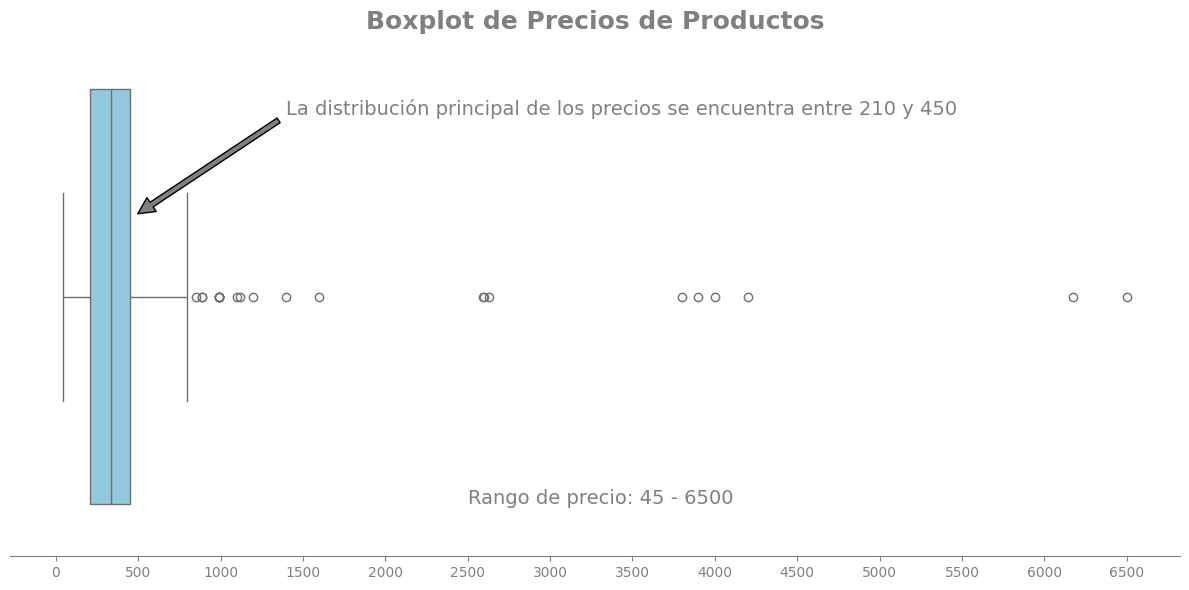

In [ ]:
q2 = df_productos['precio'].quantile(0.25).astype(int)
q4 = df_productos['precio'].quantile(0.75).astype(int)

plt.figure(figsize=(12,6))

#Boxplot
ax = sns.boxplot(df_productos['precio'], orient='h', color='skyblue')
plt.text(1400, -0.35, f'La distribución principal de los precios se encuentra entre {q2} y {q4}', fontsize=14, color='gray')
plt.annotate('', xy=(q4, -0.15), xytext=(1400, -0.35),
             arrowprops=dict(facecolor='gray', shrink=0.05))

plt.text(2500, 0.4, f'Rango de precio: {df_productos["precio"].min()} - {df_productos["precio"].max()}', fontsize=14, color='gray')

#Formato para el contorno del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='x', colors='gray')
ax.set_xticks(range(0, df_productos['precio'].max()+1, 500))

plt.title('Boxplot de Precios de Productos', fontsize=18, color='gray', fontweight= 'bold')
plt.xlabel('')
plt.tight_layout()
plt.show()

Insights de Precios por Producto

El boxplot nos muestra que el rango de precios está en 210 a 450R$. Nos muestra que la empresa tiene una gran variabilidad de productos y precios, lo cual podría ser atractivo para una base de clientes más amplia.


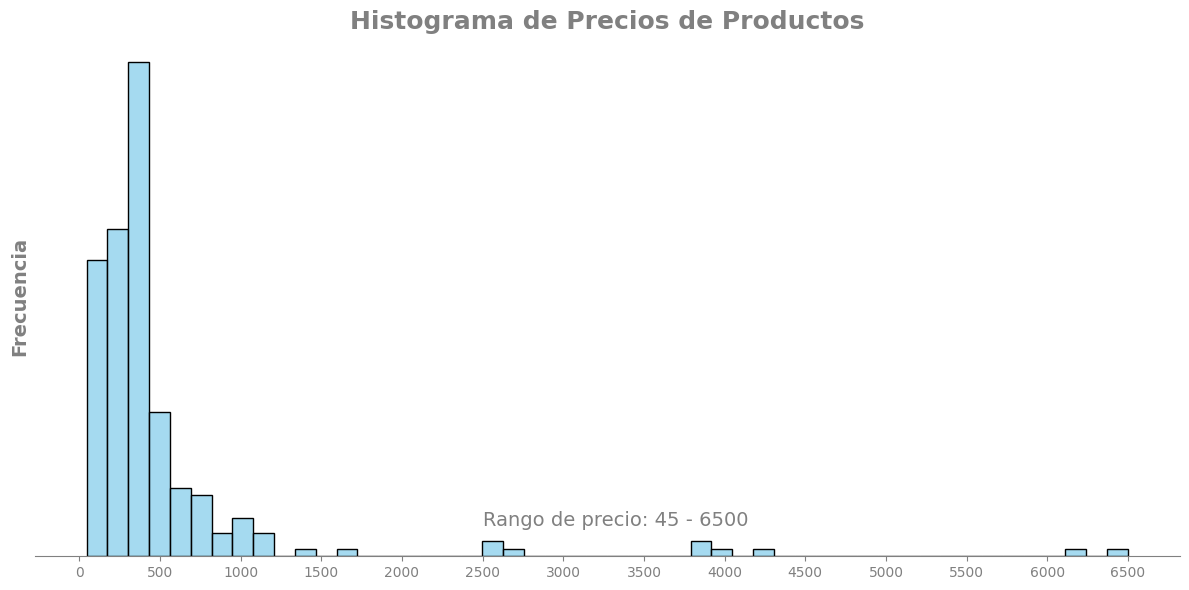

In [ ]:
plt.figure(figsize=(12, 6))

# Histograma
sns.histplot(df_productos['precio'], color='skyblue', bins=50)  # Puedes ajustar el número de bins según tus datos
plt.text(2500, 4, f'Rango de precio: {df_productos["precio"].min()} - {df_productos["precio"].max()}', fontsize=14, color='gray')

#Formato para el contorno del gráfico
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
ax.set_xticks(range(0, df_productos['precio'].max()+1, 500))
ax.yaxis.set_ticks_position('none')
ax.set_xlabel('')
plt.yticks([])

plt.title('Histograma de Precios de Productos', fontsize=18, color='gray', fontweight='bold')
plt.ylabel('Frecuencia', fontsize=14, color='gray', fontweight='bold')
plt.tight_layout()
plt.show()



1.   Existen 205 productos diferentes.
2.   La mayoría de los productos rondan entre los 210 - 450



In [ ]:
df_vendedores.describe()

,vendedor_id
count,6.000000
mean,3.500000
std,1.870829
min,1.000000
25%,2.250000
50%,3.500000
75%,4.750000
max,6.000000


El dataframe de vendedores NO nos da mucha información por sí sola.

#**3. Preguntas y respuestas**


---




##**3.1 Creando el banco de datos**

In [ ]:
#Función crear conexión para el banco de datos
def crear_conexion():
  global df_itens_pedidos, df_pedidos, df_productos, df_vendedores, database
  #Motor
  database = create_engine('sqlite:///database.db')
  #Añadiendo los dataframes a sus respectivas tablas SQL en la base de datos
  df_itens_pedidos.to_sql('itens_pedidos', con=database, if_exists='replace', index=False)
  df_pedidos.to_sql('pedidos', con=database, if_exists='replace', index=False)
  df_productos.to_sql('productos', con=database, if_exists='replace', index=False)
  df_vendedores.to_sql('vendedores', con=database, if_exists='replace', index=False)

In [ ]:
#Inspeccionando el Banco de Datos
crear_conexion()
inspector = inspect(database)
print('Tablas: ', inspector.get_table_names(), '\n')
print('Columnas de Tabla Pedidos:')
for column in inspector.get_columns('pedidos'):
    print(column)
database.dispose()

Tablas:  ['itens_pedidos', 'pedidos', 'productos', 'vendedores'] 

Columnas de Tabla Pedidos:
{'name': 'pedido_id', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'producto_id', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'vendedor_id', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'fecha_compra', 'type': DATETIME(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'total', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}


##**Pregunta 1: ¿Cual es el Top 5 productos más vendidos históricamente?**

In [ ]:
#Definir la consulta SQL para obtener los 5 productos más vendidos, junto con la cantidad total de los mismos
query = """
    SELECT ip.producto_id, p.producto, p.marca, SUM(ip.valor_total) AS total_vendido, SUM(ip.cantidad) AS cantidad_vendida
    FROM itens_pedidos ip
    INNER JOIN productos p ON ip.producto_id = p.producto_id
    GROUP BY ip.producto_id
    ORDER BY cantidad_vendida DESC
    LIMIT 5;
"""
df = pd.read_sql_query(query, database)
df['total_vendido']=(df['total_vendido']/1000).apply(lambda x: f'${x:.0f}K')
df

,producto_id,producto,marca,total_vendido,cantidad_vendida
0,32126,Saia Midi Cinto,Limone By Jade Seba,$115K,549
1,13814,Vestido Nude Reta,Ellus,$301K,547
2,47405,Blusa Manga Estampa,Animale,$166K,536
3,33976,Camisa Xadrez Azul,Hollister,$61K,511
4,53941,Cropped Escritas Pb,Linda de Morrer,$142K,508


<ipython-input-24-61a890281244>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df.cantidad_vendida, y=df.producto, orient='h', palette=custom_palette, width=0.57, joinstyle='bevel')
<ipython-input-24-61a890281244>:7: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.barplot(x=df.cantidad_vendida, y=df.producto, orient='h', palette=custom_palette, width=0.57, joinstyle='bevel')


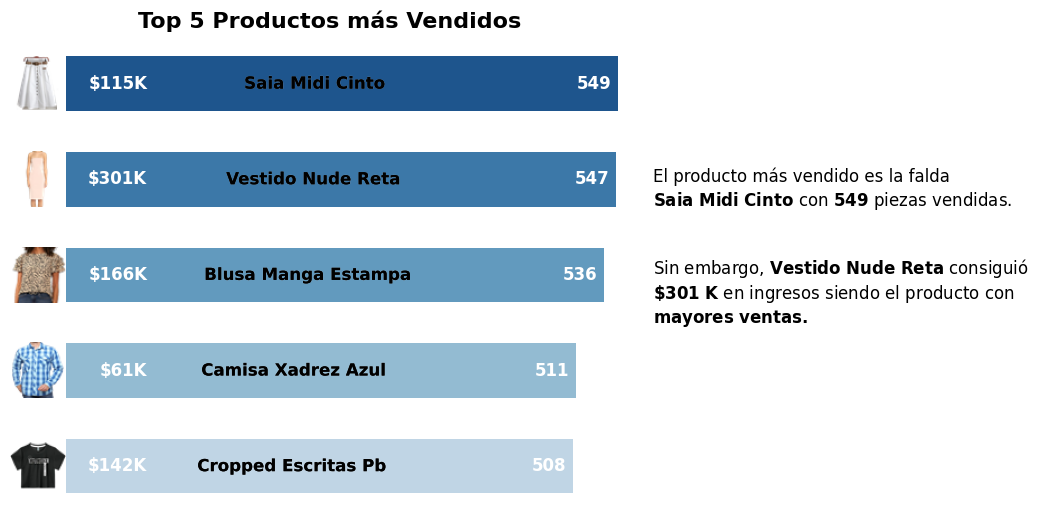

In [ ]:
from matplotlib import patheffects
#Crear el gráfico de barras
plt.figure(figsize=(12, 6))

# Crear una paleta de colores personalizada con tonos de azul
custom_palette = sns.color_palette("Blues_r", n_colors=6)
ax = sns.barplot(x=df.cantidad_vendida, y=df.producto, orient='h', palette=custom_palette, width=0.57, joinstyle='bevel')

image_paths = ["https://raw.githubusercontent.com/alejandramcr/Store_Sales_Analysis/main/images/falda.png",
               "https://raw.githubusercontent.com/alejandramcr/Store_Sales_Analysis/main/images/vestido.png",
               "https://raw.githubusercontent.com/alejandramcr/Store_Sales_Analysis/main/images/blusa.png",
               "https://raw.githubusercontent.com/alejandramcr/Store_Sales_Analysis/main/images/camisa.png",
               "https://raw.githubusercontent.com/alejandramcr/Store_Sales_Analysis/main/images/cropped.png"]

new_patches = []
for patch, color, producto, cantidad, total, image_path in zip(ax.patches, custom_palette, df['producto'], df['cantidad_vendida'], df['total_vendido'], image_paths):
  bb = patch.get_bbox()
  p_bbox = FancyBboxPatch((bb.xmin, bb.ymin), abs(bb.width), abs(bb.height),
                          boxstyle = "round,pad = -0.05, rounding_size=0.73", ec='none', fc=color,mutation_aspect=0.73)

  #Añadir imagen
  response = requests.get(image_path)
  image = plt.imread(BytesIO(response.content))
  imagebox = OffsetImage(image, zoom=0.8)
  ab = AnnotationBbox(imagebox, xy=(25, patch.get_y() + patch.get_height() / 2),
                      xybox=(0,0), xycoords='data', boxcoords='offset points',
                      pad=0, arrowprops=dict(arrowstyle="-", color='none'),
                      bboxprops=dict(facecolor='none', edgecolor='none'))
  ax.add_artist(ab)

  #Agregar el nombre de la marca en medio de la barra
  ax.annotate(producto, xy=(patch.get_width() / 2, patch.get_y() + patch.get_height() / 2),
                xytext=(0, 0), textcoords='offset points',
                fontsize=12, ha='center', va='center', color='black', fontweight='bold',
              path_effects=[patheffects.withStroke(linewidth=0.1, foreground="white")])

  ax.annotate(f'{cantidad}', xy=(patch.get_width(), patch.get_y() + patch.get_height()/2),
              xytext=(-5,0), textcoords=('offset points'), arrowprops=dict(arrowstyle='-', color='none'),
              color = 'white', fontweight ='bold', fontsize=12, ha='right', va='center', xycoords='data',
              bbox=dict(facecolor='none', edgecolor='none', pad=0),
              annotation_clip=False)

  ax.annotate(f'{total}', xy=(130, patch.get_y() + patch.get_height() / 2),
              xytext=(-5,0), textcoords=('offset points'), arrowprops=dict(arrowstyle='-', color='none'),
              color = 'white', fontweight ='bold', fontsize=12, ha='right', va='center', xycoords='data',
              bbox=dict(facecolor='none', edgecolor='none', pad=0),
              annotation_clip=False)

for patch in new_patches:
    ax.add_patch(patch)

#Añadir título y etiquetas de los ejes
plt.title('Top 5 Productos más Vendidos', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
texto = ("El producto más vendido es la falda\n"
        "$\\bf{Saia\\ Midi\\ Cinto}$ con $\\bf{549}$ piezas vendidas."
        "\n\n\nSin embargo, $\\bf{Vestido\\ Nude\\ Reta}$ consiguió\n"
        "$\\bf{\\$301\\ K}$ en ingresos siendo el producto con\n$\\bf{mayores\\ ventas.}$")
plt.text(580, 2.5, texto, fontsize=12, color='black')

#Eliminar los bordes de la figura
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

Insights Top 5 productos más vendidos

1. Aunque “Saia Midi Cinto” es el artículo más vendido, “Vestido Nude Reta” genera más ingresos. Esto indica que el volumen de ventas no es el único factor a considerar al evaluar el éxito de un producto. El precio de venta y el margen de beneficio también son factores importantes.
2. En base a los datos, si la empresa concentra sus esfuerzos de marketing y producción en “Vestido Nude Reta” y productos similares que generan altos ingresos, puede obtener más beneficios.


##**Pregunta 2: ¿Cual es la evolución histórica de las ingresos netos?**

In [ ]:
#Definir la consulta SQL
query = """
    SELECT fecha_compra, SUM(total - costo_envio) AS ingresos_netos
    FROM pedidos
    INNER JOIN itens_pedidos ON pedidos.pedido_id = itens_pedidos.pedido_id
    GROUP BY fecha_compra;
"""
#Ejecutar la consulta SQL y guardar el resultado en un DataFrame
df = pd.read_sql_query(query, database)
# Verificar y convertir el tipo de dato de la columna fecha_compra
if df['fecha_compra'].dtype != 'datetime64[ns]':
    df['fecha_compra'] = pd.to_datetime(df['fecha_compra'])

df.head()

,fecha_compra,ingresos_netos
0,2019-01-05,32460.8
1,2019-01-06,1728.0
2,2019-01-07,1560.0
3,2019-01-08,1024.0
4,2019-01-09,400.0


In [ ]:
#Definir la consulta 2 SQL
query = """
SELECT pr.marca, SUM(p.total - ip.costo_envio) AS ingresos_netos
FROM pedidos p
INNER JOIN itens_pedidos ip ON p.pedido_id = ip.pedido_id
INNER JOIN productos pr ON ip.producto_id = pr.producto_id
WHERE DATE(p.fecha_compra) = '2019-11-24'
GROUP BY pr.marca
ORDER BY ingresos_netos DESC;
"""
#Ejecutar la consulta SQL y guardar el resultado en un DataFrame
df2 = pd.read_sql_query(query, database)
# Sumar los ingresos netos de los registros después del sexto y clasificarlos como 'Otros'
otros_ingresos = df2.iloc[5:]['ingresos_netos'].sum()

# Crear un nuevo DataFrame para los primeros cinco registros y agregar la fila de 'Otros'
df2 = pd.concat([df2.iloc[:5], pd.DataFrame({'marca': ['Otros'], 'ingresos_netos': [otros_ingresos]})])
# Ordenar el DataFrame de mayor a menor por ingresos netos
df2 = df2.sort_values(by='ingresos_netos', ascending=False)
df2

,marca,ingresos_netos
0,Otros,205581.6
0,Barbara Bela,20160.0
1,Givenchy,19200.0
2,Mixed,18683.2
3,Tory Burch,13904.0
4,Jimmy Choo,12432.0


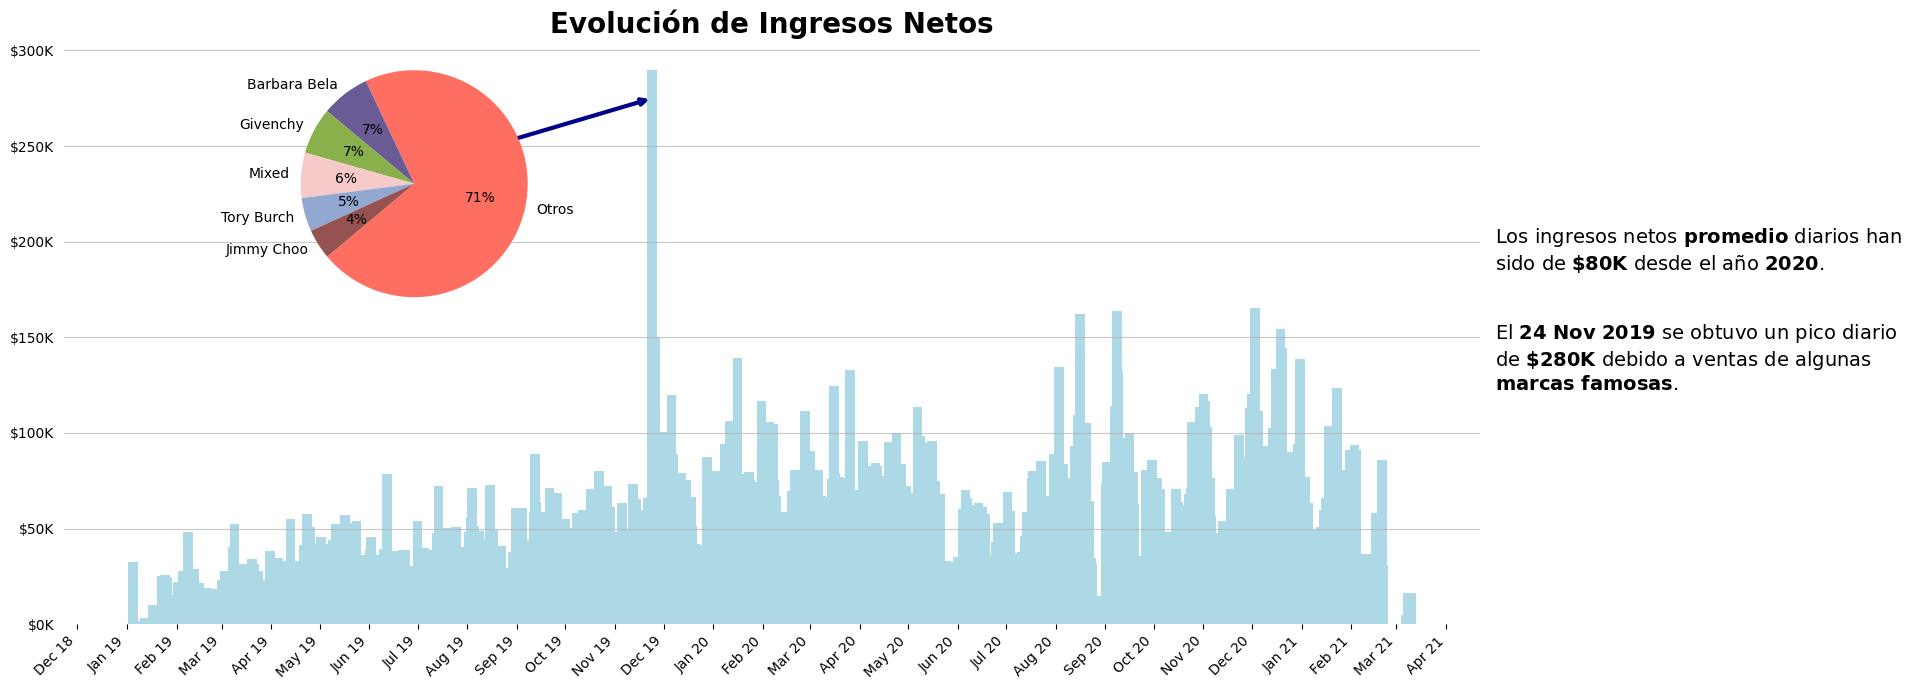

In [ ]:
# Crea el gráfico de barras
fig, ax = plt.subplots(figsize=(15, 7))
bars = ax.bar(df.fecha_compra, df.ingresos_netos/1e3, width=6, color='lightblue')

# Título
ax.set_title('Evolución de Ingresos Netos', fontsize=20, fontweight='bold', loc='center')

# Configura el formato de las fechas en el eje X y las inclina a 45 grados
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))  # Cambia el formato a "Ene 21", "Feb 21", etc.
plt.xticks(rotation=45, ha='right')  # Inclina las fechas a 45 grados y alinea a la derecha

ax.grid(axis='y', linestyle='-', alpha=0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('none')

# Configuración del formateo de etiquetas del eje Y
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}K".format(round(int(x), 2))))

# Agregar texto a la derecha del gráfico
texto = ("Los ingresos netos $\\bf{promedio}$ diarios han\nsido de $\\bf{\\$80K}$ desde el año $\\bf{2020}$.\n\n\n"
         "El $\\bf{24\\ Nov\\ 2019}$ se obtuvo un pico diario\nde $\\bf{\\$280K}$ debido a ventas de algunas\n$\\bf{marcas\\ famosas}$.")

fig.text(1, 0.55, texto, ha='left', va='center', fontsize=14)

# Encuentra la barra más grande
indice_barra_mas_grande = df.ingresos_netos.argmax()
barra_mas_grande = bars[indice_barra_mas_grande]

# Coordenadas de la punta de la flecha
x_flecha = df.fecha_compra.iloc[indice_barra_mas_grande]
y_flecha = barra_mas_grande.get_height() - 15

# Dibuja la flecha
plt.annotate('', xy=(x_flecha, y_flecha), xytext=(0.30, 0.82), textcoords='axes fraction',
             arrowprops=dict(facecolor='black', edgecolor='darkblue', arrowstyle='->', linewidth=3), zorder=5)

custom_palette = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', '#B565A7', '#009B77', '#DD4124', '#D65076']

# Crea el gráfico de pastel
ax_pie = fig.add_subplot(221)
ax_pie.pie(df2['ingresos_netos'], labels=df2['marca'], autopct='%1.0f%%', startangle=220, colors=custom_palette)
plt.subplots_adjust(wspace=0.1)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Evolución de ingresos Netos
1. Tendencia general: En la gráfica parece que hubo un pico en noviembre de 2019, pero desde 2020, la tendencia general parece ser una disminución en los ingresos netos.

2. No parece haber un patrón estacional o cíclico evidente, aunque el pico en noviembre de 2019 podría sugerir que hay ciertos momentos del año en los que los ingresos netos aumentan. Han habido picos durante el año 2019 (suponemos por el covid-19 y el confinamiento), algunos picos en noviembre y diciembre de 2020 que nos hace pensar que las ventas aumentan en navidades o black friday.

##**Pregunta 3: ¿Cuáles son los ingresos netos por vendedor por año?**

In [ ]:
df_itens_pedidos.head()

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0


In [ ]:
df_pedidos.head()

,pedido_id,producto_id,vendedor_id,fecha_compra,total
0,341,41518,6,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575


In [ ]:
df_vendedores.head()

,vendedor_id,nombre_vendedor
0,1,Ana Duarte
1,2,Daniel Siqueira
2,3,Nadia Oliveira
3,4,Millena Pereira
4,5,Paulo Calanca


In [ ]:
query = """
    SELECT v.nombre_vendedor,
      SUM(CASE WHEN strftime('%Y', p.fecha_compra) = '2019' THEN p.total - ip.costo_envio ELSE 0 END) AS total_2019,
      SUM(CASE WHEN strftime('%Y', p.fecha_compra) = '2020' THEN p.total - ip.costo_envio ELSE 0 END) AS total_2020,
      SUM(CASE WHEN strftime('%Y', p.fecha_compra) = '2021' THEN p.total - ip.costo_envio ELSE 0 END) AS total_2021
    FROM pedidos p
    JOIN vendedores v ON p.vendedor_id = v.vendedor_id
    JOIN itens_pedidos ip ON p.pedido_id = ip.pedido_id
    GROUP BY v.nombre_vendedor;
"""

# Ejecutar la consulta SQL y guardar el resultado en un DataFrame
df = pd.read_sql_query(query, database)

# Establecer la columna 'nombre_vendedor' como índice del DataFrame
df.set_index('nombre_vendedor', inplace=True)
#Eliminar el último índice con el vendedor desconocido
df = df.iloc[:-1]
df

,total_2019,total_2020,total_2021
nombre_vendedor,,,
Ana Duarte,2154261.6,5054009.6,547470.4
Daniel Siqueira,2020503.2,5266932.8,419702.4
Millena Pereira,2054682.4,3804385.6,398896.0
Nadia Oliveira,2296986.4,4046902.4,810020.0
Paulo Calanca,3702835.2,3609530.4,455401.6


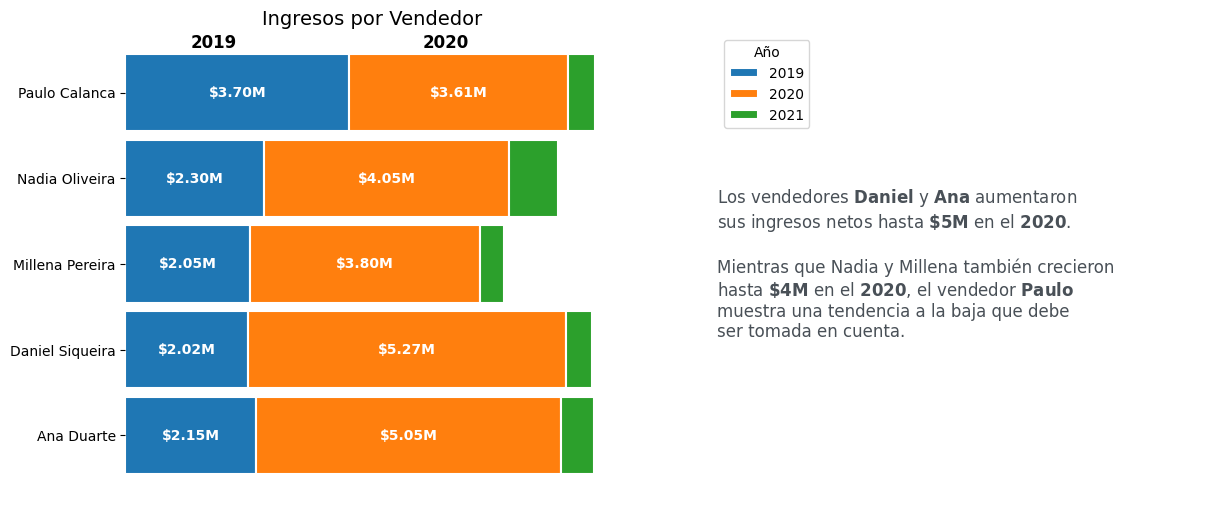

In [ ]:
#Gráfico de ingresos netos por vendedor
def plot_stacked_barh(data, category_names):
    labels = data.index
    data = data.values

    fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1]}, figsize=(14, 6))
    ax1.xaxis.set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.set_title('')
    ax1.set_xlabel('')
    ax1.set_xticks([])

    ax1.set_title('Ingresos por Vendedor', fontsize=14)
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    ax1.legend('Año')
    ax1.get_legend().remove()

    for i, colname in enumerate(category_names):
        widths = data[:, i]
        starts = np.cumsum(data[:, :i], axis=1)[:, -1] if i > 0 else 0
        bars = ax1.barh(labels, widths, left=starts, height=0.9, edgecolor='white', linewidth=1.5,
                 label=colname)


        for bar, c in zip(bars, data[:, i]):
            if colname != "2021":
                ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
                         f'${c / 1000000:.2f}M', ha='center', va='center', color='white', fontweight='bold')

    ax1.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')


    conclusion_text=(
    "Los vendedores $\\bf{Daniel}$ y $\\bf{Ana}$ aumentaron\n"
    "sus ingresos netos hasta $\\bf{\\$5M}$ en el $\\bf{2020}$.\n\n"

    "Mientras que Nadia y Millena también crecieron\n"
    "hasta $\\bf{\\$4M}$ en el $\\bf{2020}$, el vendedor "
    "$ \\bf{Paulo}$\nmuestra una tendencia a la baja "
    "que debe \nser tomada en cuenta.")

    ax2.text(0,0.5,conclusion_text,fontsize=12,color='#495057',va='center',ha='left')
    ax2.axis('off')

    #Crear leyenda para el segundo subplot
    handles, labels = ax1.get_legend_handles_labels()
    ax2.legend(handles, labels, loc='upper left', title='Año')
    ax1.get_legend().remove()

    ax1.text(0.18, 0.98, '2019', ha='center', va='center', fontsize=12, fontweight='bold', transform=ax1.transAxes)
    ax1.text(0.65, 0.98, '2020', ha='center', va='center', fontsize=12, fontweight='bold', transform=ax1.transAxes)

    return fig, (ax1, ax2)

plot_stacked_barh(df, ["2019", "2020", "2021"])
plt.show()

Insights Ingresos por vendedor

1. Ventas similares entre la mayoría de los vendedores: Ana Duarte, Daniel Siqueira, Nadia Oliveira y Paulo Cabanas tienen un rendimiento de ventas similar y elevado. Esto podría indicar que estos vendedores están realizando un trabajo consistente en términos de ventas.
2. Rendimiento de ventas más bajo para Milena Pereira: Milena Pereira tiene un rendimiento significativamente menor en comparación con los demás vendedores. Esto podría indicar la necesidad de capacitación adicional o apoyo para Milena para mejorar su rendimiento en ventas.
3. Oportunidades para aumentar las ventas: Dado que algunos vendedores tienen un rendimiento de ventas más alto que otros, podría ser útil compartir las mejores prácticas y estrategias de ventas entre el equipo para ayudar a aumentar las ventas generales.


##**Pregunta 4: ¿Cuáles son las ciudades que proporcionan mayores ingresos netos?**

In [ ]:
#Definir la consulta SQL
query = """
    SELECT ip.ciudad, SUM(ip.costo_envio) AS costos, SUM(p.total - ip.costo_envio) AS ingresos_netos
    FROM pedidos p
    INNER JOIN itens_pedidos ip ON p.pedido_id = ip.pedido_id
    GROUP BY ip.ciudad;
"""
#Ejecutar la consulta SQL y guardar el resultado en un DataFrame
df = pd.read_sql_query(query, database)
df['abbrev_state'] = df['ciudad'].apply(lambda x: x.replace('BR-', ''))
df.head()

,ciudad,costos,ingresos_netos,abbrev_state
0,BR-AC,282130.0,1128520.0,AC
1,BR-AL,380504.0,1522016.0,AL
2,BR-AM,311023.2,1244092.8,AM
3,BR-AP,368934.4,1475737.6,AP
4,BR-BA,330629.4,1322517.6,BA


In [ ]:
#Seleccionar columnas de interes
df1 = df[["ingresos_netos", "abbrev_state"]]
df1.head()

,ingresos_netos,abbrev_state
0,1128520.0,AC
1,1522016.0,AL
2,1244092.8,AM
3,1475737.6,AP
4,1322517.6,BA


In [ ]:
#Seleccionar columnas de interes 2
df2 = df[["costos", "abbrev_state"]]
df2.head()

,costos,abbrev_state
0,282130.0,AC
1,380504.0,AL
2,311023.2,AM
3,368934.4,AP
4,330629.4,BA


In [ ]:
#Crear la geomtría
br_uf = geobr.read_state()
br_uf_d1 = br_uf.merge(df1)
br_uf_d1 = br_uf_d1[["geometry", "ingresos_netos","abbrev_state"]]
br_uf_d1.head()

In [ ]:
#Crear la geomtría 2
br_uf = geobr.read_state()
br_uf_d2 = br_uf.merge(df2)
br_uf_d2 = br_uf_d2[["geometry", "costos","abbrev_state"]]
br_uf_d2.head()

In [ ]:
#Crear figura 1
f, ax = plt.subplots()
f.set_size_inches(10, 10)

#Graficar
br_uf_d1.plot(
    ax=ax,
    column="ingresos_netos",
    cmap="Blues",
    edgecolor="black",
    linewidth=0.05,
)

cax = f.add_axes(
    [
        0.82,    # pos x (entre 0.0 y 1.0)
        0.18,    # pos y (entre 0.0 y 1.0)
        0.03,    # largo x
        0.40,    # altura y
    ]
)

sm = plt.cm.ScalarMappable(
    cmap="Blues",
    norm=plt.Normalize(
        vmin=br_uf_d1["ingresos_netos"].min(),
        vmax=br_uf_d1["ingresos_netos"].max(),
    ),
)
#Colorbar
f.colorbar(
    sm,
    cax=cax,
    format=ticker.FuncFormatter(lambda x, pos: f"${x/1000000:,.2f}M"),
)

#Añadir los nombres de las ciudades
for idx, row in br_uf_d1.iterrows():
    ax.text(
        row.geometry.centroid.x,
        row.geometry.centroid.y,
        row["abbrev_state"],
        fontsize=7,
        ha='center',
        va='center',
        #fontweight='bold',
        bbox=dict(
            facecolor='lightblue',
            edgecolor='black',
            linewidth=0.7,
            boxstyle='round,pad=0.2',
        )
    )
#Título
ax.set_title("Ingresos Netos por Ciudad en Brasil", fontsize=20, fontweight='bold')

#Texto
texto1 = " $\\bf{Alagoas}$ y $\\bf{Pernambuco}$ superan los $\\bf{\\$1.50M}$\nen ingresos netos históricos."
f.text(0.8, 0.65, texto1, fontsize=12)
texto2 = "Ciudades como $\\bf{Acre}$ y $\\bf{Mato\\ Grosso\\ do\\ Sul}$\nson las que registran $\\bf{menores\\ ingresos}$ históricos\ncon cifras inferiores a $\\bf{\\$1.20M}$, lo que sugiere un\nplan de acción para $\\bf{mejorar\\ las\\ ventas}$."
f.text(0.05,0.28,texto2, fontsize=11)

ax.axis("off")

Insights Ingresos netos por ciudad en Brasil
1. Disparidades Económicas: El mapa muestra diferentes niveles de ingreso neto en distintas ciudades de Brasil, lo que proporciona una visión de las disparidades económicas y las posibles áreas de mejora para los negocios.
2. Planificación Estratégica: Estos datos son esenciales para la planificación empresarial y económica, ya que permiten identificar regiones con mayor o menor potencial económico.
3. Oportunidades de Negocio: La comprensión de estas disparidades puede ayudar a la empresa a identificar oportunidades de negocio y a adaptar sus estrategias de marketing y ventas a cada región.


##**Pregunta 5: ¿Cuáles son las ciudades que menos productos compran?**

In [ ]:
import sqlite3
# Conectando la base de datos SQLite
conn = sqlite3.connect('database.db')

# Consulta SQL
query = """
SELECT
    ciudad,
    COUNT(pedido_id) AS numero_de_pedidos,
    SUM(valor_total) AS ingresos_netos,
    SUM(costo_envio) AS costo_envio
FROM
    itens_pedidos
GROUP BY
    ciudad
ORDER BY
    numero_de_pedidos ASC;
"""

# Ejecutando la consulta y guarda el resultado en un DataFrame
df = pd.read_sql_query(query, conn)
df


In [ ]:
import matplotlib.pyplot as plt

# Ordenamos el DataFrame por 'numero_de_pedidos' y selecciona las primeras 5 ciudades
df_menos_vendidas = df.sort_values('numero_de_pedidos').head(5)

plt.figure(figsize=(10, 6))  # Creamos una nueva figura con un tamaño específico
plt.barh(df_menos_vendidas['ciudad'], df_menos_vendidas['numero_de_pedidos'], color='skyblue')  # Crea un gráfico de barras horizontales
plt.xlabel('Número de Pedidos')  # Etiqueta del eje x
plt.ylabel('Ciudad')  # Etiqueta del eje y
plt.title('Top 5 Ciudades con Menos Ventas')  # Título del gráfico
plt.show()  # Muestra el gráfico


Insights Top 5 ciudades con menos ventas
1. Oportunidades de Mercado: Las ciudades con menos ventas representan una oportunidad para expandir el mercado. Podrían beneficiarse de estrategias de marketing dirigidas y promociones específicas para aumentar la conciencia de marca y la demanda.
2. Análisis de Causas: Es importante investigar las razones detrás de las bajas ventas en estas áreas. Factores como la preferencia de los consumidores, la competencia local, la logística y la infraestructura de internet pueden influir en el rendimiento.
3. Personalización de la Oferta: Adaptar el inventario y las campañas de marketing a las preferencias y necesidades locales puede mejorar la relevancia y el atractivo de la tienda para los consumidores de estas ciudades.
4. Mejora de la Logística: Optimizar la cadena de suministro y los procesos de entrega puede reducir los costos y mejorar la experiencia del cliente, lo que podría traducirse en un aumento de las ventas.

# Pregunta 6: ¿La condición del producto es importante para el cliente?

In [ ]:
# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear el boxplot
boxplots = ax.boxplot([df_productos[df_productos['condicion'] == cond]['precio'] for cond in df_productos['condicion'].unique()],
                      patch_artist=True,  # Esto permite llenar el boxplot con color
                      medianprops={'color': 'black'})  # Esto hace que la mediana sea de color negro

# Cambiar el color de cada boxplot a azul
for box in boxplots['boxes']:
    box.set(color='#4286f4', linewidth=2)  # Establecer el color del borde
    box.set(facecolor='#4286f4')  # Establecer el color de relleno

# Configurar las etiquetas del eje x
ax.set_xticklabels(df_productos['condicion'].unique())

# Configurar las etiquetas de los ejes
ax.set_xlabel('condicion')
ax.set_ylabel('precio')

# Configurar el título
ax.set_title('Boxplot de Precios por Condición')

# Mostrar el gráfico
plt.show()

Insights de los Precios por su Condición

1. Variabilidad de Precios: Los productos usados tienen una mayor variabilidad en los precios, lo que podría indicar una flexibilidad en cuanto a lo que los clientes están dispuestos a pagar.

2. Consistencia: Los productos nuevos, con o sin etiqueta, muestran menos variabilidad, sugiriendo que los clientes esperan un rango de precios más consistente para estos artículos.

3. Valores Atípicos: La presencia de valores atípicos en los productos usados puede indicar que algunos clientes valoran ciertos aspectos únicos o raros de estos productos

En general, el boxplot sugiere que la condición del producto es un factor importante para los clientes al determinar el precio que están dispuestos a pagar.

En conclusión, el análisis de data science aplicado a la tienda de moda online en Brasil ha revelado patrones significativos y oportunidades de crecimiento.Hemos identificado las preferencias de los consumidores y las tendencias de compra, lo que permite una personalización más efectiva y una gestión de inventario optimizada.